# 1. load file

In [1]:
from useful import *
def loadgwy(fn,pxl):
    fnlong = fn
    # print(":-)")
    import gwyfile
    import numpy as np
    container = gwyfile.load(fnlong)
    arr = container['/0/data']['data']
    arr = arr.reshape(pxl)
    print('I can read the variables in outside')
    return arr
fn ='phaseAnalysis2/2HTaSe2_bae_110K015.gwy'
pxl = 1024



arr = loadgwy(fn, (pxl,pxl))


I can read the variables in outside


In [2]:
512*512

262144

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


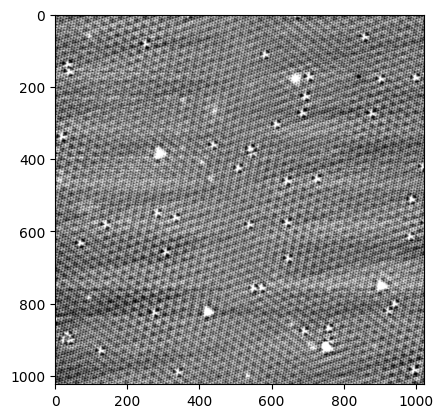

In [3]:
from matplotlib import pyplot as plt
from useful import auto199
p = 10**(-12)
# plt.imshow(arr,vmin=-10*p,vmax=10*p)

mn = np.min(arr)
mx = np.max(arr)
mean = np.mean(arr)
std = np.std(arr)


plt.imshow(arr,cmap='gray')
auto199()


# 2. Preprocessing


In [4]:
def ceilcut(image,threshold):
  imagec = image.copy()
  imagec[image>threshold] = threshold
  return imagec
from scipy.ndimage import gaussian_filter

In [5]:
def plot_result(image, background):
    fig, ax = plt.subplots(nrows=1, ncols=3)

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original image')
    ax[0].axis('off')

    ax[1].imshow(background, cmap='gray')
    ax[1].set_title('Background')
    ax[1].axis('off')

    ax[2].imshow(image - background, cmap='gray')
    ax[2].set_title('Result')
    ax[2].axis('off')

    fig.tight_layout()
    return fig,ax

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


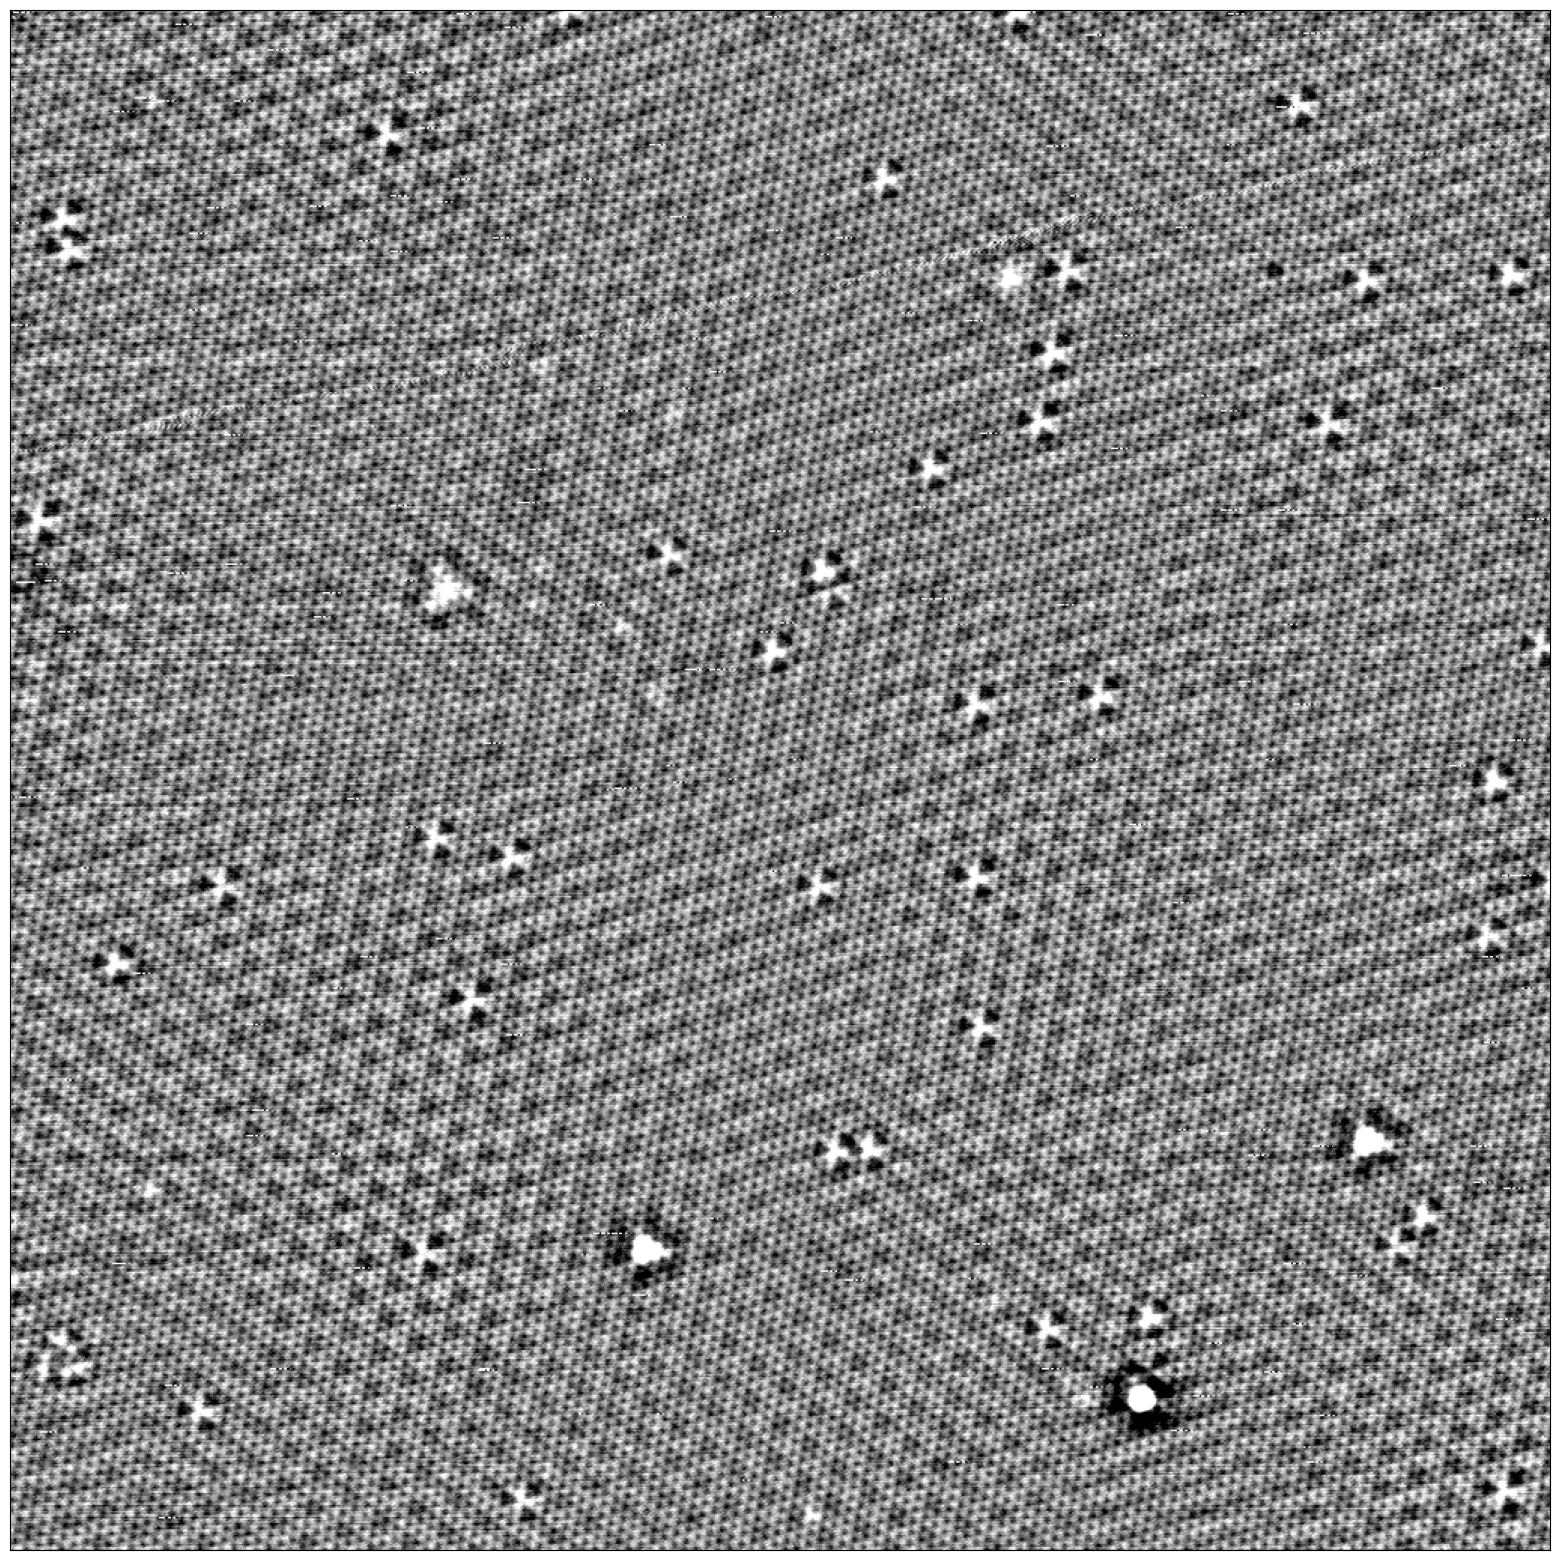

In [21]:
param_sigma = 10
arr_g = gaussian_filter(arr,sigma=param_sigma)
plt.figure(figsize=(20, 20))
plt.imshow(arr-arr_g,cmap='gray')
plt.xticks([])
plt.yticks([])
auto199()
plt.savefig('stm_topography.png', dpi=300, bbox_inches='tight', pad_inches=0)
arr_cln = arr-arr_g

# 3. FFT Peak Choose

In [8]:
import imagingPhase.ffts as imfft

imagingPhase package loaded


In [81]:
vmin = 0 # @param
vmax = 0.00000005 # @param
threshold = 0#0.0000000001 # @param
choose = [1,4,3] # @param

[[538 650]
 [370 465]
 [628 421]]
3


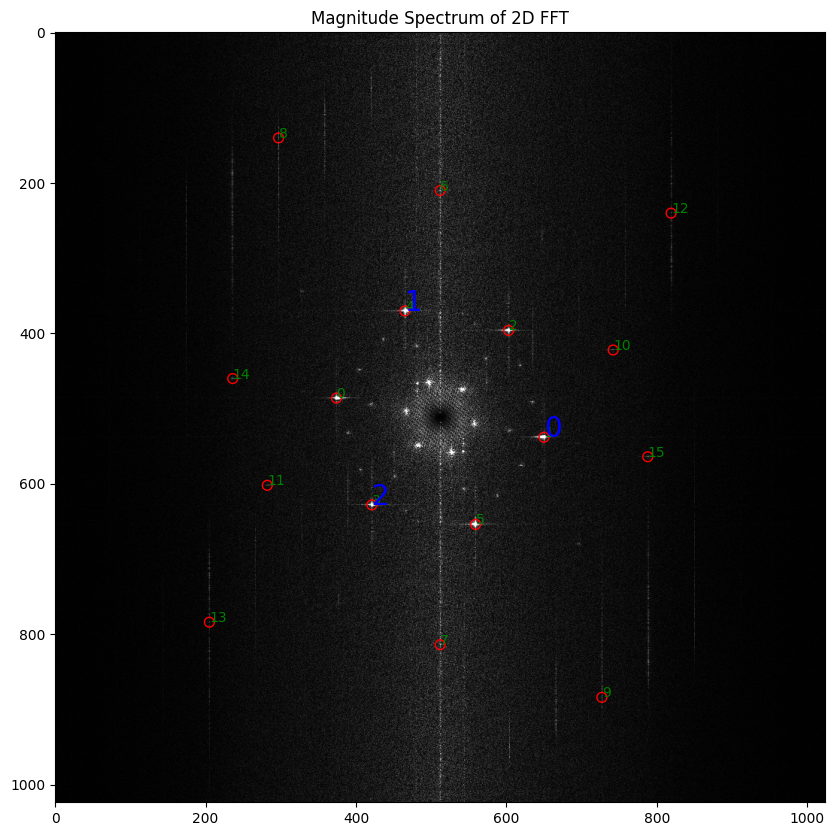

In [ ]:
%matplotlib inline
fft2abs = imfft.fft2show(arr_cln,vmin,vmax)
pk_choose,pk_all = imfft.fft2pkfnd(fft2abs,threshold,choose)
plt.savefig('2dfft.svg', dpi=300, bbox_inches='tight', pad_inches=0)

In [89]:
fft2abs.shape
p1
p2

array([[543.2, 677.6],
       [341.6, 455.6],
       [651.2, 402.8]])

In [90]:
scl = 1.2
atomPos = 1000
len_interp = int(atomPos*scl)+1#1201
# atomPos = int(1200/scl)
fft_pflss = []
# p1 = [0,0]
# for idt in range(len(fns)):
    # arr_cln = arrSries.iloc[idt]
    # fft_result = fft2(arr_cln)
    # fft2abs = fftshift(abs(fft2(arr_cln)))
fft2abs = imfft.get_magnitude_spectrum(arr_cln)    
fft_pfls = []
sz = arr_cln.shape
p1 = np.array([sz[0]//2,sz[1]//2])
for of3 in range(3):              
    p2 = pk_choose[of3]*scl + p1
    fft_pfl = imfft.get_line_profile(fft2abs, p1, p2, len_interp)        
    fft_pfls.append(fft_pfl)
    

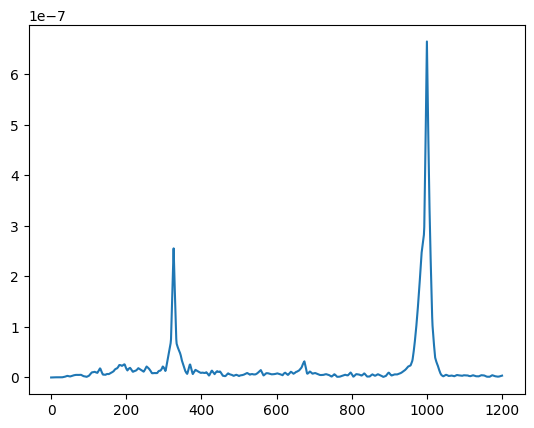

In [91]:
plt.plot(fft_pfls[0])

# 4. get Phase,Amplitude map

In [29]:
import imagingPhase.get_phimap as gpm


In [49]:
ua = np.array([-1, 1])*np.pi
dfphase = pd.DataFrame({
'arrfcn':[lambda x:x,gpm.wrap_phase,lambda x: gpm.wrap_phase(3*x)/3],
'cmap':['jet','twilight_shifted','RdBu'],
'clim':[ua*3,ua*(1),ua*(1/3)],
'phaseStr':['monotonic','circular','circular(x3)'],
'ticks':[[-np.pi*3, -np.pi*(2/3), 0, np.pi*(2/3), np.pi*3],
    [-np.pi, -np.pi*(2/3), 0, np.pi*(2/3), np.pi],
    [ -np.pi*(1/3), 0, np.pi*(1/3)]],
'tick_labels':[[r"$-3\pi$", r"$-\frac{2}{3}\pi$" ,"", r"$\frac{2}{3}\pi$" ,r"$3\pi$"],
[r"$-\pi$", r"$-\frac{2}{3}\pi$" ,r"$0$", r"$\frac{2}{3}\pi$" ,r"$\pi$"],
[r"$-\frac{1}{3}\pi$" ,r"$0$", r"$\frac{1}{3}\pi$" ]]
})

In [51]:
dfphaseNow = dfphase.iloc[1]

In [52]:
dfphaseNow

arrfcn               <function wrap_phase at 0x00000223EC9B3B00>
cmap                                            twilight_shifted
clim                     [-3.141592653589793, 3.141592653589793]
phaseStr                                                circular
ticks          [-3.141592653589793, -2.0943951023931953, 0, 2...
tick_labels    [$-\pi$, $-\frac{2}{3}\pi$, $0$, $\frac{2}{3}\...
Name: 1, dtype: object

In [69]:
sig = 10
angle_restores = gpm.phi2Hrecover(arr_cln, pk_choose, sig) # length 3 list whose element is (1024,1024) array

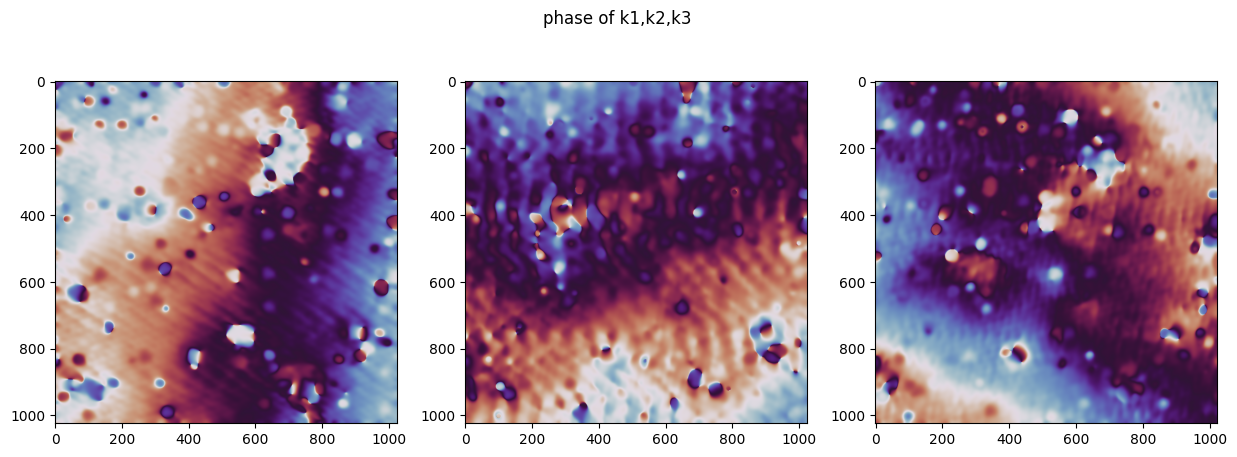

In [72]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
dfphaseNow = dfphase.iloc[1]
for ik in range(3):
    dt = angle_restores[ik]
    dt_wrap = dfphaseNow['arrfcn'](dt)
    axs[ik].imshow(dt_wrap,cmap=dfphaseNow['cmap'],clim=dfphaseNow['clim'])    
fig.suptitle('phase of k1,k2,k3')
plt.savefig('phase_of_k1k2k3.svg', dpi=300, bbox_inches='tight', pad_inches=0)

In [33]:
len(angle_restores)

3

In [ ]:
xprodss = [] 
ampss = []

arr = arrSries[fns[idt]]
xprods = []
amps = []
for ik in range(3):        
    k = pk_chooses[idt][ik]
    xprod = gpm.kdisplacementmap(arr,k,.1)
    amp = np.abs(xprod)
